# Co-Occurance Martrix + Training Loss Visualizaiton

In [ ]:
import numpy as np

matrix = np.fromfile('matrix.dat', dtype=int)
n = int(np.sqrt(len(matrix)))
matrix = matrix.reshape(n, n)

<ipython-input-41-1bba312a7f93>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar.ax.set_yticklabels([


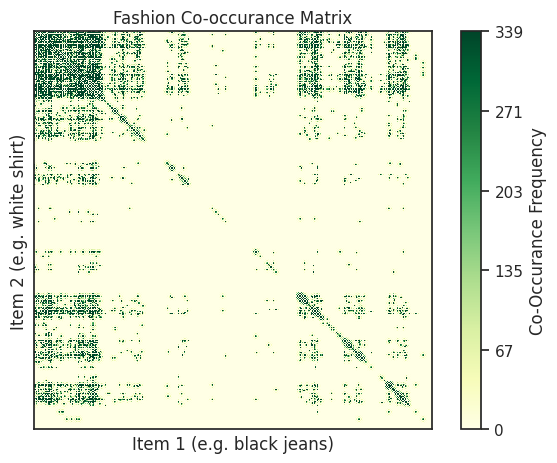

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

fig = plt.figure()
plt.imshow(
    matrix,
    cmap = 'YlGn',
    interpolation = 'sinc',
    vmin = 0,
    vmax = 0.1
)
plt.xticks([])
plt.yticks([])
bar = plt.colorbar()
plt.title("Fashion Co-occurance Matrix")
plt.xlabel("Item 1 (e.g. black jeans)")
plt.ylabel("Item 2 (e.g. white shirt)")
bar.ax.set_yticklabels([
    0,
    np.max(matrix)//5,
    (2*np.max(matrix))//5,
    (3*np.max(matrix))//5,
    (4*np.max(matrix))//5,
    np.max(matrix)
])
bar.set_label("Co-Occurance Frequency")
plt.tight_layout()
plt.show()
fig.savefig(f"matrix.pdf", format="pdf", dpi=1200)
fig.savefig(f"matrix.png", format="png", dpi=1200)

In [ ]:
import pandas as pd
train_logs_df = pd.read_pickle("train_logs")
valid_logs_df = pd.read_pickle("valid_logs")
train_logs_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
dice_loss,0.828514,0.332771,0.258107,0.241648,0.230418,0.220541,0.213692,0.216153,0.214319,0.197192,0.199006,0.196442,0.194705,0.190924,0.187910,0.186888,0.187273,0.180666,0.182751,0.177955
iou_score,0.198432,0.588558,0.621948,0.633121,0.643417,0.654343,0.661949,0.656555,0.658622,0.681959,0.679072,0.681088,0.683406,0.688348,0.692088,0.692958,0.691867,0.701747,0.698167,0.705036


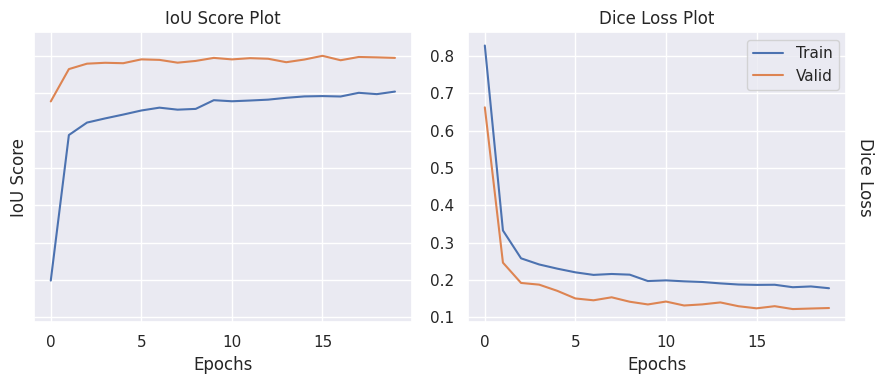

In [ ]:
sns.set_style("darkgrid")
fig = plt.figure(figsize=(9,4))
ax1 = plt.subplot(1, 2, 1)
plt.plot(train_logs_df.index.tolist(), train_logs_df.iou_score.tolist(), label = 'Train')
plt.plot(valid_logs_df.index.tolist(), valid_logs_df.iou_score.tolist(), label = 'Valid')
plt.xlabel('Epochs')
plt.ylabel('IoU Score')
plt.title('IoU Score Plot')
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(train_logs_df.index.tolist(), train_logs_df.dice_loss.tolist(), label = 'Train')
plt.plot(valid_logs_df.index.tolist(), valid_logs_df.dice_loss.tolist(), label = 'Valid')
plt.xlabel('Epochs')
plt.ylabel('Dice Loss', rotation=-90, labelpad=20)
plt.title('Dice Loss Plot')
plt.legend(loc='best')
ax2.yaxis.set_label_position("right")
ax1.tick_params(labelleft=False)
plt.tight_layout()
plt.show()
fig.savefig(f"loss.pdf", format="pdf", dpi=1200)
fig.savefig(f"loss.png", format="png", dpi=1200)